## 1. 测试 geopandas 读取 mid mif

In [ ]:
from geopandas import GeoDataFrame
from math import cos, pi, hypot, log, tan, floor, exp, atan
import math

def getXY(lon, lat, zoom):
    """
    :param: lon: 
    :param: lat: 
    :param: zoom: 
    :return: (x,y)
    """
    lat1 = log (tan ((90 + lat) * pi / 360)) / (pi / 180)
    res = 2 ** (zoom - 1)
    pix_x = floor(lon * res/180 + res)
    pix_y = floor(lat1 * res/180 + res)
    return pix_x,pix_y


def test():
    df = GeoDataFrame.from_file("/Users/andyzhuang/Documents/0-业务/地图数据说明/yuangang/北京市.mid")
    print(df.dtypes)
    len_dict = dict()
    for index, row in df.iterrows():
        id = row['id']
        length = row['length']
        start = row['geometry'].coords[0]
        # print(start[0], start[1])
        zoom = 12
        x,y = getXY(start[0], start[1], zoom)
        key = '_'.join([str(e) for e in [x,y]])
        if key not in len_dict:
            len_dict[key] = 0
        len_dict[key] += float(length)
    print(len(len_dict), len_dict)
    import matplotlib.pyplot as plt
    plt.hist(list(len_dict.values()), bins=100)

test()                

## 2. numpy 统计各个维度的信息，可视化

* 统计：percentile
* 可视化

### 1. 总体和抽样，格子里分值的分布

median 4.6665736150523326e-05
average 0.0007751937984496124
mean 0.0007751937984496124
max 0.03797841246172453
min 6.523933441265288e-08
std 0.0027650295005112006
sum 1.000000000000001


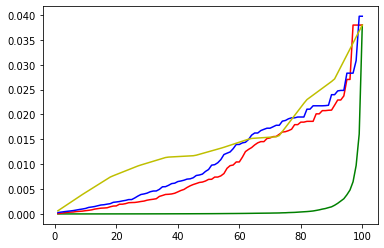

In [51]:
def fun(arr):
    """
    选择不同的列
    """
    return float(arr[5])

y=list()
with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_stat", 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        y.append(fun(arr))

import numpy as np
print("median", np.median(y))
print("average", np.average(y))
print("mean", np.mean(y))
print("max", np.max(y))
print("min", np.min(y))
print("std", np.std(y))
print("sum", sum(y))

u=list()
with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_sample", 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        u.append(fun(arr))
        
v=list()
with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_sample_per95", 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        v.append(fun(arr))
        
m=list()
with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_sample_1", 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        m.append(fun(arr))
        
# u_p95=list()
# with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_per95_sample_1", 'r') as f:
#     for line in f:
#         arr = line.strip().split('\t')
#         u_p95.append(fun(arr))
        
# v_p95=list()
# with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_per95_sample_2", 'r') as f:
#     for line in f:
#         arr = line.strip().split('\t')
#         v_p95.append(fun(arr))
# m_p95=list()
# with open("/Users/andyzhuang/tmp/res_grid_output_zoom13_per95_sample_3", 'r') as f:
#     for line in f:
#         arr = line.strip().split('\t')
#         m_p95.append(fun(arr))
        

x = range(len(y))
px = range(1, 101)

py = np.percentile(y, px)
pu = np.percentile(u, px)
pv = np.percentile(v, px)
pm = np.percentile(m, px)
# pu_p95 = np.percentile(u_p95, px)
# pv_p95 = np.percentile(v_p95, px)
# pm_p95 = np.percentile(m_p95, px)

import matplotlib.pyplot as plt
# y.sort()
# plt.plot(x, y) 
plt.plot(px, py, 'g-', px, pu, 'r-', px, pv, 'b-', px, pm, 'y-')

# plt.plot(px, py, 'g-', px, pu, 'r-', px, pv, 'b-', px, pm, 'y-', px, pu_p95, 'r+', px, pv_p95, 'b+', px, pm_p95, 'y+')


# plt.hist(y, 100)

## 110000 格子分布，不同抽样结果的对比 

median 426.0
average 5960.106976744186
mean 5960.106976744186
max 282913.0
min 1.0
std 21165.70776939088
sum 7688538.0


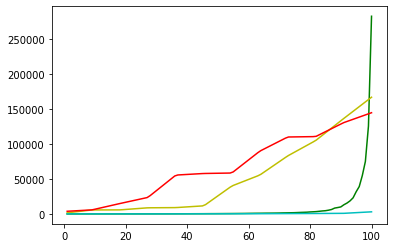

In [19]:
def fun(arr):
    """
    选择不同的列
    """
    return float(arr[2])

basedir='/Users/andyzhuang/Documents/0-业务/11-评测/POI/sampling_exp_1/110000_result/'

y=list()
with open(basedir + 'grid_score_z13', 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        y.append(fun(arr))

u=list()
with open(basedir + 'samp_allinone', 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        u.append(fun(arr))
        
v=list()
with open(basedir + 'samp_poi_location_weight_allinone', 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        v.append(fun(arr))
        
m=list()
with open(basedir + 'samp_noweight_allinone', 'r') as f:
    for line in f:
        arr = line.strip().split('\t')
        m.append(fun(arr))        
        
import numpy as np
print("median", np.median(y))
print("average", np.average(y))
print("mean", np.mean(y))
print("max", np.max(y))
print("min", np.min(y))
print("std", np.std(y))
print("sum", sum(y))

x = range(len(y))
px = range(1, 101)

py = np.percentile(y, px)
pu = np.percentile(u, px)
pv = np.percentile(v, px)
pm = np.percentile(m, px)

import matplotlib.pyplot as plt

# plt.plot(x, y) 
# plt.plot(px, py, 'g-')
plt.plot(px, py, 'g-', px, pu, 'y-', px, pv, 'r-', px, pm, 'c-')

# plt.hist(y, 100)

## 110000 格子内部的统计指标


summary
click_num
summary
click_num
summary
click_num


	max	min	median	avg	std	sum
	max	min	median	avg	std	sum
	max	min	median	avg	std	sum


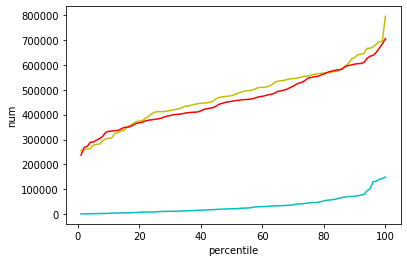

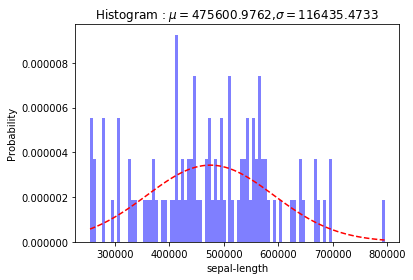

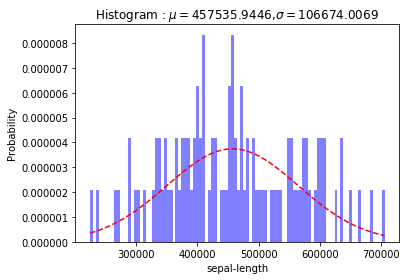

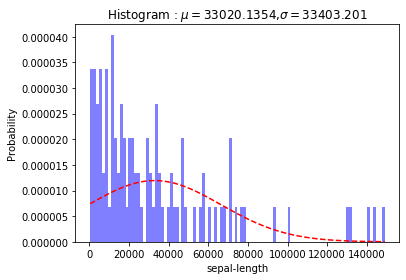

In [55]:
import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

class Stats(object):
    def __init__(self):
        self.median = None
        self.avg = None
        self.max = None
        self.min = None
        self.std = None
        self.sum = None


def calc_stats(y):
    """
    计算一个列表的统计值
    :param y:
    :return:
    """
    stats = Stats()
    stats.max = np.max(y)
    stats.min = np.min(y)
    stats.median = round(np.median(y), 4)
    stats.avg = round(np.average(y), 4)
    stats.std = round(np.std(y), 4)
    stats.sum = round(sum(y), 4)
    return stats

def sample_basic_stat(path):
    """
    统计一个目录下多个sample文件的均值和标准差
    poi_num, click_num, nav_num, location_num, score
    :param path:
    :return:
    """
    col_name = ['grid_id', 'city_code', 'poi_num', 'click_num', 'nav_num', 'location_num', 'score', 'percent']
    # files = os.listdir(path)
    # files.sort()
    # j, k = 2, 7
    r = [3]
    stats_col_list = [list() for i in range(8)]
    for filename in glob.glob('%s/samp_*' % path):
        # if os.path.isdir(filename):
        #     continue
        number_list = [list() for i in range(8)]
        with open(filename, 'r') as f:
            for line in f:
                arr = line.strip().split("\t")
                for i in r:
                    number_list[i].append(float(arr[i]))
        for i in r:
            y = number_list[i]
            name = col_name[i]
            stats = calc_stats(y)
            stats_col_list[i].append(stats)
    print('summary', file=sys.stderr)
    # total_stats = Stats()
    print('', 'max', 'min', 'median', 'avg', 'std', 'sum', sep='\t')
    for i in r:
        name = col_name[i]
        print(name, file=sys.stderr)
        stats_list = stats_col_list[i]
        return [stats.avg for stats in stats_list]
#         avg_stats = calc_stats([stats.avg for stats in stats_list])
#         median_stats = calc_stats([stats.median for stats in stats_list])
#         sum_stats = calc_stats([stats.sum for stats in stats_list])

def draw_norm_hist(y):
    # 绘制直方图
    num_bins = 100
    n, bins, patches = plt.hist(y, num_bins,density=1, facecolor='blue', alpha=0.5) 
    #直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象
    stats_y = calc_stats(y)
    mu = stats_y.avg
    sigma = stats_y.std
    normy = norm.pdf(bins, mu, sigma) #拟合一条最佳正态分布曲线y 
    plt.plot(bins, normy, 'r--') #绘制y的曲线
    plt.xlabel('sepal-length') #绘制x轴 
    plt.ylabel('Probability') #绘制y轴
    plt.title(r'Histogram : $\mu=%s$,$\sigma=%s$'%(mu, sigma)) # 中文标题 u'xxx'
    plt.subplots_adjust(left=0.15)#左边距
    plt.show()



y = sample_basic_stat('/Users/andyzhuang/Documents/0-业务/11-评测/POI/sampling_exp_1/110000_result/samp_grid_nochange')
u = sample_basic_stat('/Users/andyzhuang/Documents/0-业务/11-评测/POI/sampling_exp_1/110000_result/samp_grid_poi_location_weight')
v = sample_basic_stat('/Users/andyzhuang/Documents/0-业务/11-评测/POI/sampling_exp_1/110000_result/samp_grid_noweight')
        
        
x = range(len(y))
px = range(1, 101)

py = np.percentile(y, px)
pu = np.percentile(u, px)
pv = np.percentile(v, px)



plt.plot(px, py, 'y-', px, pu, 'r-', px, pv, 'c-')
plt.xlabel('percentile') #绘制x轴 
plt.ylabel('num') #绘制y轴
plt.show()
draw_norm_hist(y)
draw_norm_hist(u)
draw_norm_hist(v)


## 不同密度的格子的分布对比

median 8.0
average 29.83296364224145
mean 29.83296364224145
max 1358
min 1
std 54.00935222186455
sum 9320504


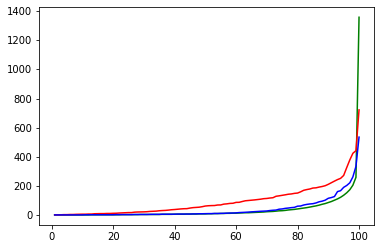

In [20]:
y = list()
grid_id_elem_count = dict()
with open("/Users/andyzhuang/git/maps_arch/road_sampling/data/1000_grid_collection_uflag_lt40_4elem.csv", 'r') as f:
    for line in f:
        line = line.strip()
        arr = line.split('\t')
        grid_id = arr[0]
        total_elem = int(arr[11])
        if total_elem == 0:
            continue
        grid_id_elem_count[grid_id] = total_elem
        y.append(total_elem)

u = list()        
with open("/Users/andyzhuang/tmp/1.txt", 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        line = line.strip()
        grid_id, link_ids = line.split('\t')
        u.append(grid_id_elem_count[grid_id])
v = list()        
with open("/Users/andyzhuang/tmp/3.txt", 'r') as f:
    for line in f:
        if line.startswith('#'):
            continue
        line = line.strip()
        grid_id, link_ids = line.split('\t')
        v.append(grid_id_elem_count[grid_id])
        
import numpy as np
print("median", np.median(y))
print("average", np.average(y))
print("mean", np.mean(y))
print("max", np.max(y))
print("min", np.min(y))
print("std", np.std(y))
print("sum", sum(y))
y.sort()
x = range(len(y))
px = range(1, 101)
py = np.percentile(y, px)
pu = np.percentile(u, px)
pv = np.percentile(v, px)
# print(py)
import matplotlib.pyplot as plt
# plt.plot(x, y) 
plt.plot(px, py, 'g-', px, pu, 'r-', px, pv, 'b-')

# plt.hist(y, 100)

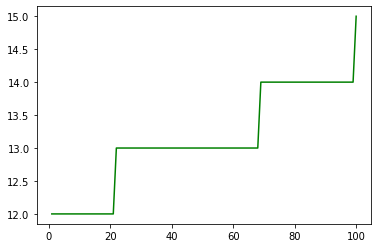

In [11]:
import numpy as np
y = list()
with open("/Users/andyzhuang/tmp/tmp1.txt", 'r') as f:
    for line in f:
        line = line.strip()
        y.append(len(line))
        
y.sort()
x = range(len(y))
px = range(1, 101)
py = np.percentile(y, px)

import matplotlib.pyplot as plt
plt.plot(px, py, 'g-')
# plt.hist(y, 100)
